## Общая информация

Выполнил Камалов Артур

Telegram: @process_rider

Презентация: https://drive.google.com/file/d/1lA9zL7vWQC6lVfz7B7LrDtTrjVUhNuwb/view?usp=sharing


**Название проекта:**

Исследование вакансий hh.ru для аналитиков данных и бизнес аналитиков

**Цели**

- Описание “идеальных кандидатов” на должности Аналитик данных и Бизнес-аналитик для различных грейдов.
- Определение типичного места работы для Аналитика данных и Бизнес-аналитика.
- Расчет помесячной динамики количества вакансий для Аналитика данных и Бизнес-аналитика. Для различных грейдов.

**Данные:**

- Собраны с помощью API hh.ru. Представлены данные о вакансиях *с сентября 2023 по январь 2024* включительно


Вакансии BA
https://docs.google.com/spreadsheets/d/1PhBJ7b944qQhIt2GNWwpZhjDiVilZSYc/edit?usp=drive_link&ouid=108762679420855503853&rtpof=true&sd=true

Вакансии DA
https://docs.google.com/spreadsheets/d/1nGG8wBPayxVlYFp6cUa-2K-MHeEaC7_i/edit?usp=sharing&ouid=108762679420855503853&rtpof=true&sd=true

In [69]:
!gdown --id 1PhBJ7b944qQhIt2GNWwpZhjDiVilZSYc

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PhBJ7b944qQhIt2GNWwpZhjDiVilZSYc
To: /content/vacancies_ba_new.xlsx
100% 6.93M/6.93M [00:00<00:00, 193MB/s]


In [70]:
!gdown --id 1nGG8wBPayxVlYFp6cUa-2K-MHeEaC7_i

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1nGG8wBPayxVlYFp6cUa-2K-MHeEaC7_i
To: /content/vacancies_da_new.xlsx
100% 1.29M/1.29M [00:00<00:00, 124MB/s]


In [71]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import folium
from IPython.display import display, HTML
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [72]:
# установка единой палитры для графиков
sns.set_palette('Set2')

In [73]:
# преобразование данных в датафреймы
ba = pd.read_excel('vacancies_ba_new.xlsx')
da = pd.read_excel('vacancies_da_new.xlsx')

## Предобработка для BA вакансий


In [74]:
# первые строки для BA
ba.head(3)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,49470036,Бизнес-аналитик,2024-01-29 21:09:56,https://hh.ru/vacancy/49470036,Открытая,ICS Consulting,NaN,Москва,Junior+ (1-3 years),"['Умение работать с людьми', 'Документация', '...",Полный день,Полная занятость,на основе конкурсного отбора обязанности учас...,основа конкурсный отбор обязанность участие ко...,90000.0,120000.0,От 100 тысяч до 200 тысяч,"Грамотность, Деловая переписка, Умение работат...",NaN,"Коммуникация, Документация, Переговоры"
1,55186681,"Проектный бизнес-аналитик 1С (ERP, УХ, КА, УТ,...",2024-01-10 11:00:30,https://hh.ru/vacancy/55186681,Открытая,Первый Бит,NaN,Москва,Middle (3-6 years),"['1С: Документооборот', '1С: Управление Произв...",Полный день,Полная занятость,"привет, будущий коллега!мы приглашаем проектны...",привет будущий коллега приглашать проектный ан...,NaN,NaN,ЗП не указана,"Управление проектами, Бизнес-анализ, Системный...",NaN,NaN
2,67043806,Бизнес-аналитик,2023-11-15 17:46:22,https://hh.ru/vacancy/67043806,Открытая,Digital Design,NaN,Москва,Junior+ (1-3 years),"['Разработка проектной документации', 'Электро...",Полный день,Полная занятость,digital design более четверти века разрабатыва...,digital design четверть век разрабатывать внед...,NaN,NaN,ЗП не указана,"Разработка проектной документации, Разработка ...",NaN,"Коммуникация, Документация"


In [75]:
# информация для BA
ba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4171 entries, 0 to 4170
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                4171 non-null   int64         
 1   name                              4171 non-null   object        
 2   published_at                      4171 non-null   datetime64[ns]
 3   alternate_url                     4171 non-null   object        
 4   type                              4171 non-null   object        
 5   employer                          4171 non-null   object        
 6   department                        651 non-null    object        
 7   area                              4171 non-null   object        
 8   experience                        4171 non-null   object        
 9   key_skills                        4171 non-null   object        
 10  schedule                          4171 non-null 

In [76]:
# доля пропущенных значений для BA
ba.isna().mean()

id                                  0.000000
name                                0.000000
published_at                        0.000000
alternate_url                       0.000000
type                                0.000000
employer                            0.000000
department                          0.843922
area                                0.000000
experience                          0.000000
key_skills                          0.000000
schedule                            0.000000
employment                          0.000000
description                         0.000000
description_lemmatized              0.000000
salary_from                         0.777751
salary_to                           0.848238
salary_bin                          0.000000
key_skills_from_key_skills_field    0.365620
hard_skills_from_description        0.844642
soft_skills_from_description        0.376169
dtype: float64

In [77]:
# убираем лишние пробелы
# приводим строки к нижнему регистру
ba['employer'] = ba['employer'].str.strip().str.lower()
ba['department'] = ba['department'].str.strip().str.lower()
ba['area'] = ba['area'].str.strip().str.title()

In [78]:
key_skills_ba = (
    pd.Series(', '.join(ba['key_skills'])
    .split(','))
    .str.replace(r"[\[\]',]", "") # регулярное выражение для удаления знаков: [ ] ' ,
    .str.strip()
    .str.lower()
)

In [79]:
# топ скиллов BA до предобработки
key_skills_ba.value_counts().reset_index()

,index,0
0,документация,1942
1,бизнес-анализ,1476
2,аналитическое мышление,1027
3,bpmn,771
4,коммуникация,662
...,...,...
1570,ведение базы знаний операционных инструкций и ...,1
1571,описание бизнес-процессов и разработка инструкций,1
1572,анализ и автоматизация бизнес-процессов,1
1573,система менеджмента качества (смк),1


In [80]:
# функция для обработки скиллов для BA
def replace_values_ba(text):
    replacements = {'аналитика': 'анализ данных',
                'переговоры': 'коммуникация',
                'деловая коммуникация': 'коммуникация',
                'деловое общение': 'коммуникация',
                'ведение переговоров': 'коммуникация',
                'техническая документация': 'документация',
                'разработка проектной документации': 'документация',
                'business analysis': 'бизнес-анализ',
                'бизнес-аналитика': 'бизнес-анализ',
                'atlassian confluence': 'confluence',
                'atlassian jira': 'jira',
                'системный анализ': 'системный подход',
                'системное мышление': 'системный подход',
                'ms sql': 'sql',
                'автоматизация процессов управления персоналом': 'автоматизация процессов',
                'agile project management': 'agile',
                'написание тз': 'разработка инструкций',
                'разработка инструкций': 'разработка технических заданий',
                'разработка регламентов': 'разработка технических заданий',
                'постановка задач разработчикам': 'разработка технических заданий',
                'оптимизация бизнес-процессов': 'оптимизация бизнес процессов',
                'подготовка презентаций': 'ms powerpoint',
                'idef0': 'idef'}
    for key, value in replacements.items():
        text = text.replace(key, value)
    return text

In [81]:
# применяем функцию и записываем в результат в тот же столбец
ba['key_skills'] = (
    ba['key_skills']
    .str.lower()
    .str.strip()
    .apply(replace_values_ba)
    .str.replace(r"[\[\]']", "")
    .str.split(', ')
    .apply(lambda x: set(x))
    .apply(list)
    .apply(str)
)

In [82]:
key_skills_ba = (
    pd.Series(','.join(ba['key_skills'].str.strip())
    .split(','))
    .str.replace(r"[\[\]',]", "") # регулярное выражение для удаления знаков: [ ] ' ,
    .str.strip()
    .str.lower()
)

In [83]:
# харды BA
hard_ba = [
    'бизнес-анализ', 'разработка технических заданий', 'bpmn', 'sql', 'моделирование бизнес процессов',
    'анализ данных', 'confluence', 'jira', 'ms excel', 'ms visio', 'ms powerpoint', 'оптимизация бизнес-процессов',
    'uml', 'работа с большим объемом информации', 'автоматизация процессов', 'анализ бизнес показателей',
    'сбор и анализ информации', 'управление проектами', 'idef', 'аналитические исследования', 'описание бизнес-процессов',
    'power bi', 'бизнес-моделирование', 'постановка задач разработчикам', 'управление бизнес процессами',
    'оптимизация бизнес процессов', 'erp', 'базы данных', 'erp-системы на базе 1с', '1с: предприятие 8',
    '1с: бухгалтерия', 'crm', 'python', '1с: документооборот', 'epc', '1с: зарплата и управление персоналом',
    'разработка регламентов', 'бухгалтерский учет', 'английский язык'
]

# софты BA
soft_ba = [
    'документация', 'коммуникация', 'аналитическое мышление', 'работа в команде',
    'проактивность', 'scrum', 'управление бизнес процессами', 'системное подход'
]

In [84]:
# функция для классификации скиллов BA
def classify_skill_ba(skill_name):
  if skill_name in soft_ba:
    return 'soft'
  elif skill_name in hard_ba:
    return 'hard'
  return np.nan

In [85]:
# cоздаем датафрейм с самыми встречающимися навыками BA
top_skills_ba = (
    key_skills_ba
    .value_counts()
    .reset_index()
    .rename(columns={'index':'skill_name',
                     0: 'count'})
)
top_skills_ba['skill_type'] = top_skills_ba['skill_name'].apply(classify_skill_ba)

## Предобработка для DA вакансий

In [86]:
da.head(3)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,50293361,Аналитик данных (Data analyst),2024-01-29 12:16:08,https://hh.ru/vacancy/50293361,Открытая,"Красное & Белое, розничная сеть",NaN,Москва,Junior+ (1-3 years),"['MS SQL', 'Power Pivot', 'Прогнозирование', '...",Полный день,Полная занятость,для решение разнообразных и интересных задач в...,решение разнообразный интересный задача команд...,NaN,NaN,ЗП не указана,"SQL, VBA, MS SQL, MS PowerPoint, Анализ данных...",NaN,Коммуникация
1,79046568,Data Analyst / Специалист по веб-аналитике,2023-11-03 09:49:29,https://hh.ru/vacancy/79046568,Открытая,НОНТОН.РФ,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Яндекс.Директ', 'Маркетинговый анализ', 'Кон...",Полный день,Полная занятость,крупная мебельная компания в поиске web-аналит...,крупный мебельный компания поиск web аналитик ...,120000.0,200000.0,От 200 тысяч до 300 тысяч,"Google Analytics, Яндекс.Метрика, Веб-аналитик...",NaN,NaN
2,79115520,Senior Data Analyst,2023-10-15 10:00:10,https://hh.ru/vacancy/79115520,Открытая,СБЕР,Сбер. Data Science,Москва,Middle (3-6 years),[],Полный день,Полная занятость,команда сеть продаж сбера ищет руководителя на...,команда сеть продажа сбер искать руководитель ...,NaN,NaN,ЗП не указана,NaN,NaN,NaN


In [87]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                786 non-null    int64         
 1   name                              786 non-null    object        
 2   published_at                      786 non-null    datetime64[ns]
 3   alternate_url                     786 non-null    object        
 4   type                              786 non-null    object        
 5   employer                          786 non-null    object        
 6   department                        188 non-null    object        
 7   area                              786 non-null    object        
 8   experience                        786 non-null    object        
 9   key_skills                        786 non-null    object        
 10  schedule                          786 non-null    

In [88]:
da.isna().mean()

id                                  0.000000
name                                0.000000
published_at                        0.000000
alternate_url                       0.000000
type                                0.000000
employer                            0.000000
department                          0.760814
area                                0.000000
experience                          0.000000
key_skills                          0.000000
schedule                            0.000000
employment                          0.000000
description                         0.000000
description_lemmatized              0.000000
salary_from                         0.912214
salary_to                           0.890585
salary_bin                          0.000000
key_skills_from_key_skills_field    0.335878
hard_skills_from_description        0.642494
soft_skills_from_description        0.684478
dtype: float64

In [89]:
# убираем лишние пробелы
# приводим строки к нижнему регистру
da['employer'] = da['employer'].str.strip().str.lower()
da['department'] = da['department'].str.strip().str.lower()
da['area'] = da['area'].str.strip().str.title()

Наиболее трудоемкой задачей является обработка навыков из поля key_skills

In [90]:
key_skills_da = (
    pd.Series(', '.join(da['key_skills'].str.strip())
    .strip()
    .split(','))
    .str.replace(r"[\[\]',;]", "") # регулярное выражение для удаления знаков: [ ] ' , ;
    .str.strip()
    .str.lower()
)

Посмотрим на частоту упоминания навыков после приведения их к стандартному виду по вакансиям из поле key_skills. Важно отметить, что данное распределение оценивает, в первую очередь, встречаемость самих названий навыков. Оно не учитывает наличие дублей и может выдавать неккоректные значения.

Тем не менее, сейчас всё равно удобно рассмотреть самые популярные навыки. Заметно многообразие вариантов написания одного и того же по смыслу навыка, поэтому я буду приводить их к единому варианту. То есть навыки "анализ данных" и "data analysis" превратятся в "анализ данных"

In [91]:
key_skills_da.value_counts().reset_index()

,index,0
0,sql,440
1,python,377
2,pandas,204
3,data analysis,171
4,анализ данных,139
...,...,...
385,грамотность,1
386,bi системы,1
387,большие массивы данных,1
388,бизнес,1


Тщательно проанализировав возможные варианты написания навыков, я создал словарь, где ключами являются оригинальные названия, а значениями - финальный единообразный вариант.

Важно отметить, что исходя из некритической разницы в знании одного диалекта SQL и незнании других именно для аналитика (поскольку он не занимается проектированием баз данных) я принял решение объединить все возможные варианты СУБД в один SQL как таковой.

Помимо этого, все BI-инструменты объединены в один, так как имеют примерно схожий принцип работы.

Отдельные маркетинговые метрики объединены вместе.

In [92]:
# функция для замены навыков для DA
def replace_values_da(text):
    replacements = {
        'clickhouse': 'sql',
        'ms sql': 'sql',
        'mysql': 'sql',
        'sql;': 'sql',
        'sql запросы': 'sql',
        'postgresql': 'sql',
        'oracle': 'sql',
        'субд': 'sql',
        'clickhouse': 'sql',
        'аналитика': 'анализ данных',
        'ml': 'machine learning',
        'машинное обучение': 'machine learning',
        'data analysis': 'анализ данных',
        'работа с базами данных': 'sql',
        'базы данных': 'sql',
        'статистический анализ' : 'математическая статистика',
        'работа с большим объемом информации': 'big data',
        'power bi': 'bi',
        'ms power bi': 'bi',
        'tableau': 'bi',
        'анализ данных данных': 'анализ данных',
        'datalens': 'bi',
        'sql database': 'sql',
        'bi/bi': 'bi',
        'bi системы': 'bi',
        'atlassian confluence': 'confluence',
        'atlassian jira': 'jira',
        'a/b тестирование': 'a/b тесты',
        'ab тестирование': 'a/b тесты',
        'sql server': 'sql',
        'olap (online analytical processing)': 'olap',
        'umachine learning': 'machine learning',
        'инструменты визуализации': 'bi',
        'powerbi': 'bi',
        'ms bi': 'bi',
        'знание python': 'python',
        'cac': 'маркетинговые метрики',
        'cpl': 'маркетинговые метрики',
        'roi': 'маркетинговые метрики',
        'ltv': 'маркетинговые метрики',
        'cpa': 'маркетинговые метрики',
        'кредитные риски': 'анализ рисков',
        'оценка рисков': 'анализ рисков',
        'портфельные риски': 'анализ рисков',
        'analysis': 'анализ данных',
        'конкурентная анализ данных': 'анализ данных'
    }
    for key, value in replacements.items():
        text = text.replace(key, value)
    return text

In [93]:
# применяем функцию и записываем в результат в тот же столбец
da['key_skills'] = (
    da['key_skills']
    .str.lower()
    .str.strip()
    .apply(replace_values_da)
    .str.replace(r"[\[\]']", "")
    .str.split(', ')
    .apply(lambda x: set(x))
    .apply(list)
    .apply(str)
)

In [94]:
key_skills_da = (
    pd.Series(','.join(da['key_skills'].str.strip())
    .split(','))
    .str.replace(r"[\[\]',]", "") # регулярное выражение для удаления знаков: [ ] ' ,
    .str.strip()
    .str.lower()
)

In [95]:
# обработано ChatGPT
# Hard skills
hard_da = ['sql', 'python', 'pandas', 'bi', 'математическая статистика', 'a/b тесты', 'etl',
        'airflow', 'spark', 'machine learning', 'сбор и анализ информации', 'hadoop',
        'dwh', 'numpy', 'git', 'powerbi', 'презентация результатов', 'google analytics',
        'яндекс.метрика', 'api', 'grafana', 'pyspark', 'greenplum', 'matplotlib',
        'data science', 'elasticsearch', 'plotly', 'web анализ данных', 'excel', 'business english',
        'google docs', 'business intelligence systems', 'seo', 'docker', 'metabase',
        'aws', 'dbt', 'kafka', 'e-mail marketing', 'google таблицы', 'data mining',
        'ad hoc analysis', 'r', 'smm', 'crm', 'appsflyer', 'apache superset', 'confluence',
        'google tag manager', 'ms excel', 'ms visio', 'маркетинговые метрики', 'юнит-экономика',
        'анализ рисков', 'финансовый анализ', 'математическое моделирование', 'оценка рисков', 'английский язык']

# Soft skills
soft_da = ['аналитическое мышление', 'документация', 'коммуникация',
        'аналитические исследования',
        'системное мышление',
        'креативность', 'проведение презентаций',
        'умение принимать решения', 'переговоры',
        'работа в условиях многозадачности',
        'подготовка презентаций',
        'грамотная речь']

In [96]:
def classify_skill_da(skill_name):
  if skill_name in soft_da:
    return 'soft'
  elif skill_name in hard_da:
    return 'hard'
  return np.nan

In [97]:
top_skills_da = (
    key_skills_da
    .value_counts()
    .reset_index()
    .rename(columns={'index':'skill_name',
                     0: 'count'})
)
top_skills_da['skill_type'] = top_skills_da['skill_name'].apply(classify_skill_da)

# Исследовательский анализ данных для DA

## Зависимость зарплаты от грейда

In [98]:
cleaned_da = da.dropna(subset=['salary_from', 'experience'])

fig = px.scatter(cleaned_da, x='experience', y='salary_from',
                 title='Диаграмма рассеяния между нижней границей зарплаты и опытом работы для DA',
                 labels={'experience': 'Опыт работы', 'salary_from': 'Зарплата (от)'},
                 category_orders={'experience': ['Junior (no experince)',
                                                 'Junior+ (1-3 years)',
                                                 'Middle (3-6 years)',
                                                 'Senior (6+ years)']})

fig.show()

## Распределение зарплатных диапазонов в разбивке по грейдам

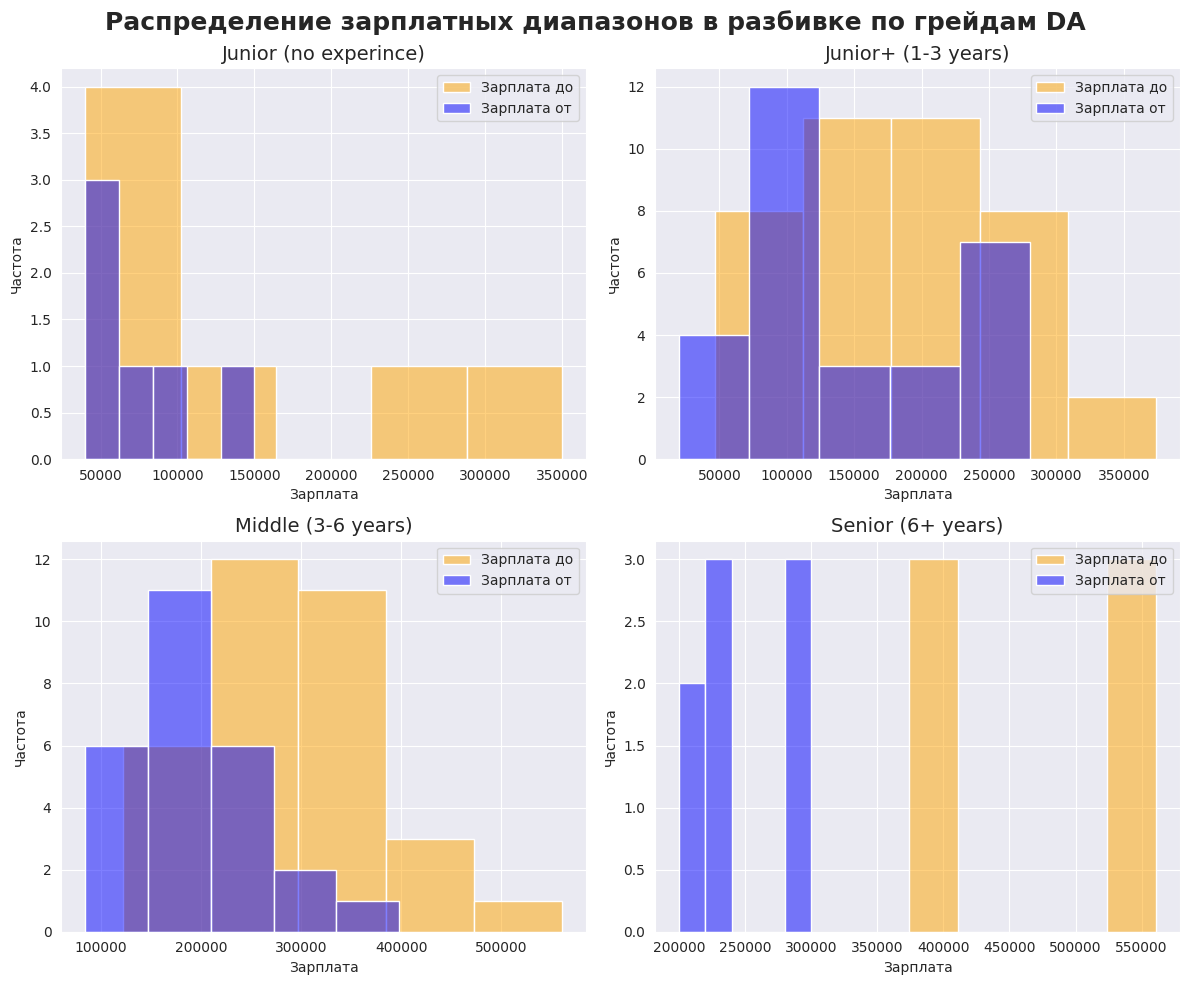

In [99]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# разделяем данные по грейдам
grades = sorted(da['experience'].unique())

# построение гистограмм для каждого грейда
for i, grade in enumerate(grades):
    data = da[da['experience'] == grade]
    row = i // 2
    col = i % 2
    ax = axes[row][col]
    sns.histplot(data=data, x='salary_to', color='orange', alpha=0.5, ax=ax, label='Зарплата до', bins=5)
    sns.histplot(data=data, x='salary_from', color='blue', alpha=0.5, ax=ax, label='Зарплата от', bins=5)
    ax.set_title(f'{grade}', fontsize=14)
    ax.set_xlabel('Зарплата')
    ax.set_ylabel('Частота')
    ax.legend()

plt.suptitle('Распределение зарплатных диапазонов в разбивке по грейдам DA',
             fontweight='bold', fontsize=18)
plt.tight_layout()
plt.show()


## Географическое распределение вакансий

In [100]:
area_count = (
    da
    .groupby('area')['name']
    .count()
    .reset_index()
    .rename(columns={'index': 'area', 'name': 'count'})
    .sort_values(by='count', ascending=False)
)

fig = go.Figure()

fig.add_trace(go.Bar(
    y=area_count['count'],
    x=area_count['area'],
    orientation='v',
    name='С учетом Москвы'
))

fig.add_trace(go.Bar(
    y=area_count[area_count['area'] != 'Москва']['count'],
    x=area_count[area_count['area'] != 'Москва']['area'],
    orientation='v',
    name='Без Москвы',
    visible=False  # изначально скрываем график без Москвы
))

# добавляем элементы управления (фильтр)
# в виде кнопок
fig.update_layout(
    title="Географическое распределение вакансий DA",
    title_font=dict(size=20),
    title_x=0.5,
    xaxis_title="Город/страна",
    yaxis_title="Количество вакансий",
    xaxis_tickangle=35,
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=[{"visible": [True, False]}],
                    label="С учетом Москвы",
                    method="update"
                ),
                dict(
                    args=[{"visible": [False, True]}],
                    label="Без Москвы",
                    method="update"
                )
            ])
        )
    ]
)

fig.show()

На данном графике видно, что подавляющее количество вакансий размещено в Москве.

С помощью фильтра `Без Москвы` можно детальнее рассмотреть количество вакансий в других городах

Рассмотрим распределение вакансий на карте. При клике на маркер на карте появляется название города и страны и количество вакансий.

В Москве наибольшее количество вакансий - 514. К примеру, в Санкт-Петербурге - 98.

In [101]:
map = folium.Map(location=[55.7558, 37.6173], zoom_start=4)

cities_coordinates = {
    'Москва': [55.7558, 37.6173],
    'Санкт-Петербург': [59.9343, 30.3351],
    'Иваново (Ивановская Область)': [57.0003, 40.9739],
    'Тбилиси': [41.7151, 44.8271],
    'Алматы': [43.2389, 76.8897],
    'Новосибирск': [55.0084, 82.9357],
    'Минск': [53.9045, 27.5615],
    'Владивосток': [43.1167, 131.8825],
    'Ташкент': [41.2995, 69.2401],
    'Ростов-На-Дону': [47.2357, 39.7015],
    'Казань': [55.7961, 49.1063],
    'Химки': [55.8886, 37.4308],
    'Екатеринбург': [56.838, 60.6057],
    'Тюмень': [57.1535, 65.5423],
    'Армения': [40.0691, 45.0382],
    'Астана': [51.1694, 71.4491],
    'Сербия': [44.7866, 20.4489],
    'Черногория': [42.7087, 19.3744],
    'Кипр': [35.1264, 33.4299],
    'Краснодар': [45.0355, 38.975],
    'Батуми': [41.6432, 41.6399],
    'Баку': [40.4093, 49.8671],
    'Атырау': [47.1076, 51.9189],
    'Турция': [38.9637, 35.2433],
    'Аксай (Казахстан)': [51.1708, 52.9951],
    'Бишкек': [42.8746, 74.5698],
    'Рязань': [54.6095, 39.7199],
    'Самара': [53.1952, 50.1069],
    'Нижний Новгород': [56.3269, 44.0076],
    'Красноярск': [56.0153, 92.8932],
    'Сочи': [43.6028, 39.7342],
    'Томск': [56.4843, 84.9477],
    'Ижевск': [56.8389, 53.2765],
    'Иннополис': [55.7516, 48.7441]
}

# добавление маркеров на карту для каждого города с отображением количества вакансий при наведении
for city, coordinates in cities_coordinates.items():
    # подсчет количества вакансий
    vacancies_count = len(da[da['area'] == city])
    folium.Marker(coordinates, popup=f"{city}: {vacancies_count} вакансий").add_to(map)

map


# Исследовательский анализ данных для BA

## Зависимости зарплаты от грейда

In [102]:
cleaned_ba = ba.dropna(subset=['salary_from', 'experience'])

fig = px.scatter(cleaned_ba, x='experience', y='salary_from',
                 title='Диаграмма рассеяния между нижней границей зарплаты и опытом работы для BA',
                 labels={'experience': 'Опыт работы', 'salary_from': 'Зарплата (от)'},
                 category_orders={'experience': ['Junior (no experince)',
                                                 'Junior+ (1-3 years)',
                                                 'Middle (3-6 years)',
                                                 'Senior (6+ years)']})

fig.show()

## Распределение зарплатных диапазонов в разбивке по грейдам

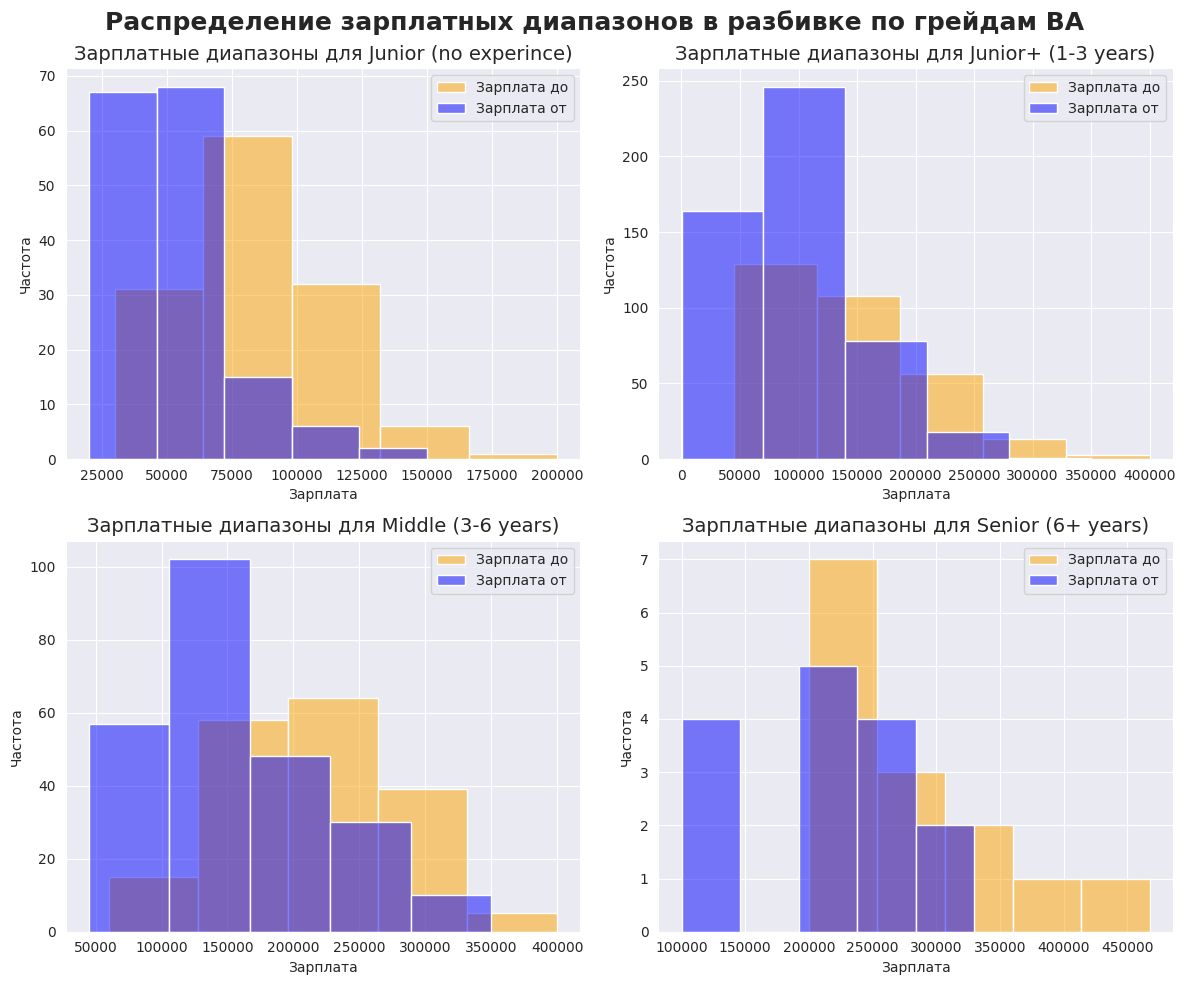

In [103]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# разделяем данные по грейдам
grades = sorted(ba['experience'].unique())

# построение гистограмм для каждого грейда
for i, grade in enumerate(grades):
    data = ba[ba['experience'] == grade]
    row = i // 2
    col = i % 2
    ax = axes[row][col]
    sns.histplot(data=data, x='salary_to', color='orange', alpha=0.5, ax=ax, label='Зарплата до', bins=5)
    sns.histplot(data=data, x='salary_from', color='blue', alpha=0.5, ax=ax, label='Зарплата от', bins=5)
    ax.set_title(f'Зарплатные диапазоны для {grade}', fontsize=14)
    ax.set_xlabel('Зарплата')
    ax.set_ylabel('Частота')
    ax.legend()

plt.suptitle('Распределение зарплатных диапазонов в разбивке по грейдам BA',
             fontweight='bold', fontsize=18)
plt.tight_layout()
plt.show()


## Географическое распределение вакансий

In [104]:
area_count = (
    ba
    .groupby('area')['name']
    .count()
    .reset_index()
    .rename(columns={'index': 'area', 'name': 'count'})
    .sort_values(by='count', ascending=False)
)

fig = go.Figure()

fig.add_trace(go.Bar(
    y=area_count['count'],
    x=area_count['area'],
    orientation='v',
    name='С учетом Москвы'
))

fig.add_trace(go.Bar(
    y=area_count[area_count['area'] != 'Москва']['count'],
    x=area_count[area_count['area'] != 'Москва']['area'],
    orientation='v',
    name='Без Москвы',
    visible=False  # изначально скрываем график без Москвы
))

# добавляем элементы управления (фильтр)
# в виде кнопок
fig.update_layout(
    title="Географическое распределение вакансий BA",
    title_font=dict(size=20),
    title_x=0.5,
    xaxis_title="Город/страна",
    yaxis_title="Количество вакансий",
    xaxis_tickangle=35,
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=[{"visible": [True, False]}],
                    label="С учетом Москвы",
                    method="update"
                ),
                dict(
                    args=[{"visible": [False, True]}],
                    label="Без Москвы",
                    method="update"
                )
            ])
        )
    ]
)

fig.show()

Географическое распределение вакансий. При клике на маркер на карте появляется название города и страны и количество вакансий.

In [105]:
map = folium.Map(location=[55.7558, 37.6173], zoom_start=4)

cities_coordinates = {
    'Москва': [55.7558, 37.6173],
    'Санкт-Петербург': [59.9343, 30.3351],
    'Иваново (Ивановская Область)': [57.0003, 40.9739],
    'Тбилиси': [41.7151, 44.8271],
    'Алматы': [43.2389, 76.8897],
    'Новосибирск': [55.0084, 82.9357],
    'Минск': [53.9045, 27.5615],
    'Владивосток': [43.1167, 131.8825],
    'Ташкент': [41.2995, 69.2401],
    'Ростов-На-Дону': [47.2357, 39.7015],
    'Казань': [55.7961, 49.1063],
    'Химки': [55.8886, 37.4308],
    'Екатеринбург': [56.838, 60.6057],
    'Тюмень': [57.1535, 65.5423],
    'Армения': [40.0691, 45.0382],
    'Астана': [51.1694, 71.4491],
    'Сербия': [44.7866, 20.4489],
    'Черногория': [42.7087, 19.3744],
    'Кипр': [35.1264, 33.4299],
    'Краснодар': [45.0355, 38.975],
    'Батуми': [41.6432, 41.6399],
    'Баку': [40.4093, 49.8671],
    'Атырау': [47.1076, 51.9189],
    'Турция': [38.9637, 35.2433],
    'Аксай (Казахстан)': [51.1708, 52.9951],
    'Бишкек': [42.8746, 74.5698],
    'Рязань': [54.6095, 39.7199],
    'Самара': [53.1952, 50.1069],
    'Нижний Новгород': [56.3269, 44.0076],
    'Красноярск': [56.0153, 92.8932],
    'Сочи': [43.6028, 39.7342],
    'Томск': [56.4843, 84.9477],
    'Ижевск': [56.8389, 53.2765],
    'Иннополис': [55.7516, 48.7441]
}

# добавление маркеров на карту для каждого города с отображением количества вакансий при наведении
for city, coordinates in cities_coordinates.items():
    # подсчет количества вакансий
    vacancies_count = len(ba[ba['area'] == city])
    folium.Marker(coordinates, popup=f"{city}: {vacancies_count} вакансий").add_to(map)

map


В Москве и Санкт-Петербурге размещено 2266 и 436 вакансий соответственно.

# Определение наиболее желаемых кандидатов
По следующим параметрам:
- самые важные hard-skils
- самые важные soft-skils
- опыт работы

Ответы даны отдельно для грейдов Junior, Junior+, Middle, Senior.

In [106]:
# функция для определения топ-хардов для каждого грейда
def many_gr(df, dataset, data_for_graph=False):
    data_res = []
    for gr in sorted(df['experience'].unique()): # пройдем по всем уникальным грейдам
        output = '' # заготовка для вывода
        filtered_df = df[df['experience'] == gr].copy()  # создаем копию отфильтрованного датафрейма

        '''
        для переменной key_skills:
        объединяем все строки в столбце filtered_df['key_skills']
        делим с помощью split() и создаём pd.Series,
        удаляем лишние символы и приводим к общему виду

        '''
        key_skills = (
            pd.Series(
                ','.join(filtered_df['key_skills'].str.strip())
            .split(','))
            .str.replace(r"[\[\]',]", "") # регулярное выражение для удаления знаков: [ ] ' ,
            .str.strip()
            .str.lower()
        )

        # в переменную top_skills сохраняем распределение навыков
        # из переменной key_skills
        top_skills = (
            key_skills
            .value_counts()
            .reset_index()
            .rename(columns={'index':'skill_name',
                            0: 'count'})
        )

        # создаём в датафрейме top_skills столбец с типом навыка для DA и BA
        if dataset == 'da':
          top_skills['skill_type'] = top_skills['skill_name'].apply(classify_skill_da)
        elif dataset == 'ba':
          top_skills['skill_type'] = top_skills['skill_name'].apply(classify_skill_ba)

        # отбираем хард скиллы
        hard_skills = (
            top_skills[top_skills['skill_type'] == 'hard']
            .drop(columns='skill_type') # удаляем столбец с типом навыка
            .reset_index(drop=True) # сбрасываем индекс
            .head(10) # сохраняем топ-10
        )
        hard_skills.columns = ['hard', 'hard_count'] # переименовываем столбцы

        # отбираем софт скиллы
        soft_skills = (
            top_skills[top_skills['skill_type'] == 'soft']
            .drop(columns='skill_type') # удаляем столбец с типом навыка
            .reset_index(drop=True) # сбрасываем индекс
            .head(10) # сохраняем топ-10
        )
        soft_skills.columns = ['soft', 'soft_count'] # переименовываем столбцы

        # объединяем датафреймы с хардами и софтами по индексу
        res = hard_skills.join(soft_skills)

        # определяем заголовок при выводе таблицы для DA и BA
        if dataset == 'da':
          output += f'<h3>{gr} DA </h3>'
        elif dataset == 'ba':
          output += f'<h3>{gr} BA </h3>'

        if data_for_graph == True:
          res = res[['hard', 'hard_count']]
          res['share_%'] = round(res['hard_count'] * 100 / np.sum(res['hard_count']))
          data_res.append(res)

        else:
          # к переменной output добавляем таблицу с хардами и софтами без индекса
          # приводим к html для красивого вывода
          output += res.to_html(index=False)
          display(HTML(output))
          print() # печатаем отступ
    if data_for_graph == True:
      return data_res

### Аналитик данных

#### Cамые важные hard-skils, soft-skils

In [107]:
many_gr(da, dataset='da')

hard,hard_count,soft,soft_count
python,7,аналитическое мышление,7.0
sql,7,коммуникация,3.0
pandas,7,аналитические исследования,1.0
bi,4,системное мышление,1.0
математическая статистика,3,документация,1.0
ms excel,2,подготовка презентаций,1.0
business english,2,NaN,NaN
презентация результатов,1,NaN,NaN
юнит-экономика,1,NaN,NaN
сбор и анализ информации,1,NaN,NaN


hard,hard_count,soft,soft_count
sql,238,аналитическое мышление,71
python,181,документация,53
bi,102,коммуникация,44
pandas,91,аналитические исследования,16
математическая статистика,49,креативность,5
confluence,30,грамотная речь,4
ms excel,28,работа в условиях многозадачности,4
a/b тесты,27,умение принимать решения,3
etl,20,системное мышление,3
spark,18,переговоры,2


hard,hard_count,soft,soft_count
sql,214,документация,57.0
python,175,коммуникация,52.0
pandas,92,аналитическое мышление,42.0
bi,57,аналитические исследования,13.0
a/b тесты,33,системное мышление,4.0
confluence,25,проведение презентаций,3.0
юнит-экономика,24,умение принимать решения,2.0
airflow,22,переговоры,2.0
английский язык,20,подготовка презентаций,1.0
математическая статистика,19,NaN,NaN


hard,hard_count,soft,soft_count
sql,15,коммуникация,5.0
python,14,аналитическое мышление,2.0
юнит-экономика,6,документация,2.0
презентация результатов,5,NaN,NaN
a/b тесты,4,NaN,NaN
elasticsearch,3,NaN,NaN
pandas,3,NaN,NaN
aws,3,NaN,NaN
ms excel,2,NaN,NaN
confluence,2,NaN,NaN


Для наглядности выведем график с самыми востребованными хард-скиллами для Junior и Middle (в силу размера выборки)

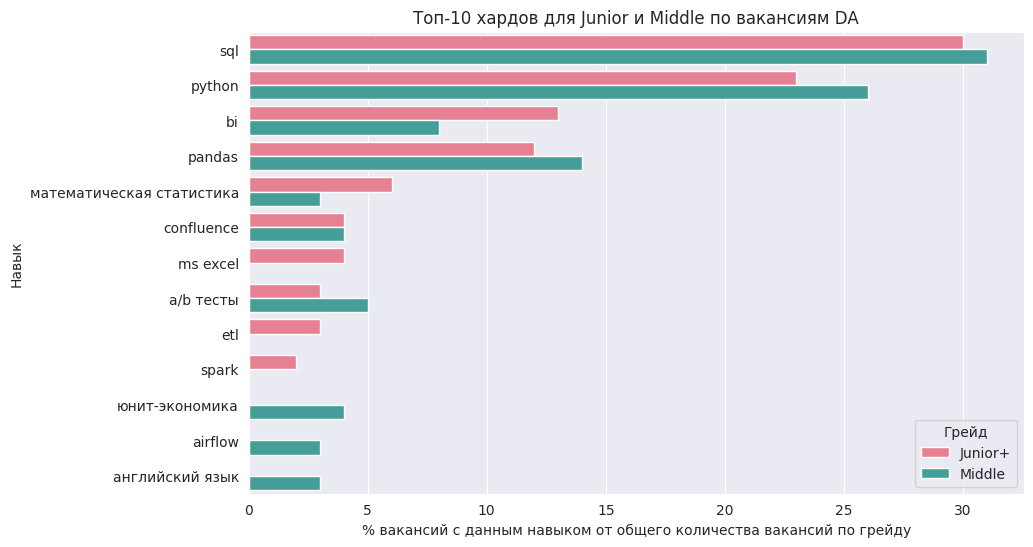

In [108]:
jun_no, jun_plus, mid, sen = many_gr(df=da, dataset='da', data_for_graph=True)

combined_grades_da = pd.concat([jun_plus.assign(flag='Junior+'), mid.assign(flag='Middle')])

plt.figure(figsize=(10, 6))

sns.barplot(data=combined_grades_da, x="share_%", y="hard", hue="flag", palette="husl")
plt.title('Топ-10 хардов для Junior и Middle по вакансиям DA')
plt.xlabel('% вакансий c данным навыком от общего количества вакансий по грейду')
plt.ylabel('Навык')
plt.legend(title='Грейд')

plt.show()

#### Описание идеальных кандидатов

Выводы можно делать только для грейдов Junior+ и Middle в силу размера выборки

**Топ-7 Хард-скиллов:**
- Junior+ и Middle имеют одинаковый набор топ-4 навыков: SQL, Python, pandas, BI. Однако от специалистов Junior+ чаще требуют знание BI-системы.
- Топ-5 навык для Junior+ - математическая статистика, в то время как у миддлов уже A/B тесты
- Топ-6 совпадает - Confluence
- Топ-7 для Junior+ - Excel, а для Middle - знание юнит-экономики

**Топ-3 Cофт-скилла:**

- Набор одинаков: от кандидатов требуют навыки коммуникации, аналитическое мышление и умение работать с документацией



#### Опыт работы

Группируем вакансии по грейдам и определяем долю вакансий каждого грейда в общем количестве

In [109]:
da_grades_dist = (
    da['experience']
    .value_counts()
    .reset_index()
    .rename(
        columns={'index': 'grade',
                 'experience': 'count'}
    )
)
da_grades_dist['share'] = round(da_grades_dist['count'] / da_grades_dist['count'].sum(), 2)
da_grades_dist

,grade,count,share
0,Junior+ (1-3 years),387,0.49
1,Middle (3-6 years),355,0.45
2,Junior (no experince),25,0.03
3,Senior (6+ years),19,0.02


### Бизнес аналитик

#### Cамые важные hard-skils, soft-skils

In [110]:
many_gr(ba, dataset='ba')

hard,hard_count,soft,soft_count
бизнес-анализ,134,аналитическое мышление,156.0
sql,53,документация,124.0
автоматизация процессов,48,коммуникация,89.0
1с: бухгалтерия,44,работа в команде,12.0
uml,42,scrum,4.0
1с: документооборот,39,управление бизнес процессами,3.0
работа с большим объемом информации,38,проактивность,1.0
разработка технических заданий,38,NaN,NaN
erp-системы на базе 1с,37,NaN,NaN
бухгалтерский учет,37,NaN,NaN


hard,hard_count,soft,soft_count
бизнес-анализ,790,документация,1012.0
разработка технических заданий,398,аналитическое мышление,528.0
bpmn,380,коммуникация,493.0
confluence,316,работа в команде,74.0
моделирование бизнес процессов,300,scrum,42.0
sql,291,проактивность,35.0
анализ данных,260,управление бизнес процессами,31.0
оптимизация бизнес процессов,259,NaN,NaN
uml,182,NaN,NaN
работа с большим объемом информации,158,NaN,NaN


hard,hard_count,soft,soft_count
бизнес-анализ,567,документация,782.0
bpmn,335,коммуникация,388.0
confluence,287,аналитическое мышление,336.0
sql,242,проактивность,53.0
разработка технических заданий,228,scrum,38.0
моделирование бизнес процессов,208,работа в команде,34.0
оптимизация бизнес процессов,179,управление бизнес процессами,26.0
анализ данных,167,NaN,NaN
uml,155,NaN,NaN
работа с большим объемом информации,105,NaN,NaN


hard,hard_count,soft,soft_count
бизнес-анализ,33,документация,40.0
sql,22,коммуникация,22.0
bpmn,19,аналитическое мышление,6.0
моделирование бизнес процессов,13,проактивность,4.0
uml,12,scrum,3.0
confluence,12,работа в команде,2.0
разработка технических заданий,9,управление бизнес процессами,2.0
анализ данных,8,NaN,NaN
jira,7,NaN,NaN
ms powerpoint,5,NaN,NaN


#### Описание идеальных кандидатов

**Junior (no experience) BA:**

Топ-7 хард-скиллов:
1. Бизнес-анализ
2. SQL
3. Автоматизация процессов
4. 1С: бухгалтерия
5. UML
6. 1С: документооборот
7. Работа с большим объемом информации

Топ-3 софт-скиллов:
1. Аналитическое мышление
2. Документация
3. Коммуникация

**Junior+ (1-3 года опыта) BA:**

Топ-7 хард-скиллов:
1. Бизнес-анализ
2. Разработка технических заданий
3. BPMN
4. Confluence
5. Моделирование бизнес процессов
6. SQL
7. Анализ данных

Топ-5 софт-скиллов:
1. Документация
2. Аналитическое мышление
3. Коммуникация
4. Работа в команде
5. Scrum

**Middle (3-6 лет опыта) BA:**

Топ-7 хард-скиллов:
1. Бизнес-анализ
2. BPMN
3. Confluence
4. SQL
5. Разработка технических заданий
6. Моделирование бизнес процессов
7. Оптимизация бизнес процессов

Топ-5 софт-скиллов:
1. Документация
2. Коммуникация
3. Аналитическое мышление
4. Проактивность
5. Работа в команде

**Senior (6+ лет опыта) BA:**

Топ-7 хард-скиллов:
1. Бизнес-анализ
2. SQL
3. BPMN
4. Моделирование бизнес процессов
5. UML
6. Confluence
7. Разработка технических заданий

Топ-3 софт-скиллов:
1. Документация
2. Коммуникация
3. Аналитическое мышление


#### Опыт работы

Группируем вакансии по грейдам и определяем долю вакансий каждого грейда в общем количестве

In [111]:
ba_grades_dist = (
    ba['experience']
    .value_counts()
    .reset_index()
    .rename(
        columns={'index': 'grade',
                 'experience': 'count'}
    )
)
ba_grades_dist['share'] = round(ba_grades_dist['count'] / ba_grades_dist['count'].sum(), 2)
ba_grades_dist

,grade,count,share
0,Junior+ (1-3 years),2122,0.51
1,Middle (3-6 years),1596,0.38
2,Junior (no experince),364,0.09
3,Senior (6+ years),89,0.02


### Самые желанные грейды для работодателей в разбивке на DA и BA

In [112]:
fig = go.Figure()

# добавляем столбцы для BA и DA
fig.add_trace(go.Bar(
    x=ba_grades_dist['grade'],
    y=ba_grades_dist['share'],
    name='BA',
    text=ba_grades_dist['share'],
    customdata=ba_grades_dist['count']
))

fig.add_trace(go.Bar(
    x=da_grades_dist['grade'],
    y=da_grades_dist['share'],
    name='DA',
    text=da_grades_dist['share'],
    customdata=da_grades_dist['count']
))

fig.update_layout(
    yaxis=dict(
        range=[0, 1]  # установка лимита для оси y
    ),
    title='Распределение долей вакансий по грейдам внутри групп BA и DA',
    xaxis_title='Грейд',
    yaxis_title='Доля',
    barmode='group'
)

# настройка всплывающего окна с информацией
fig.update_traces(
    hovertemplate='%{x}:<br>Доля: %{y:.2f}<br>Абсолютное количество: %{customdata}'
)

fig.show()

При наведении на столбец можно увидеть абсолютное количество вакансий для грейда в группе

- Наибольшее количество вакансий в BA и DA представляют Junior+ позиции
- В DA ищут больше Middle специалистов, чем в BA
- В BA ищут больше Junior без опыта, чем в DA

# Определение типичного места работы

по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.

## Аналитик данных


### ТОП-работодателей

In [113]:
da.groupby('experience')['employer'].apply(lambda x: x.value_counts().head()).to_frame()

employer
experience                                            
Junior (no experince) ресо-гарантия, сао             4
                      сбер                           4
                      компания cadesign              2
                      сдс                            1
                      ннформат                       1
Junior+ (1-3 years)   сбер                          65
                      мтс                           25
                      wildberries                   15
                      магнит, розничная сеть        10
                      росбанк                        7
Middle (3-6 years)    сбер                          32
                      playrix                       21
                      wildberries                   21
                      «uzum technologies».          10
                      usetech                        9
Senior (6+ years)     трт                            3
                      anabar                         2
                      деловые линии                  2
                      wagner and experts             2
                      леруа мерлен                   2

### Зарплата

In [114]:
# функция для определения средней зарплаты из зарплатной вилки
def mean_salary(row):
  if not np.isnan(row['salary_from']) and not np.isnan(row['salary_to']):
    return np.mean([row['salary_from'], row['salary_to']])
  elif not np.isnan(row['salary_from']):
    return row['salary_from']
  elif not np.isnan(row['salary_to']):
    return row['salary_to']
  return np.nan

In [115]:
da['mean_salary'] = da.apply(mean_salary, axis=1)
da.groupby('experience')['mean_salary'].agg(['median', 'count'])

,median,count
experience,,
Junior (no experince),70000.0,9
Junior+ (1-3 years),150000.0,49
Middle (3-6 years),270000.0,39
Senior (6+ years),313625.0,8


Зарплата стабильно растет с повышением грейда

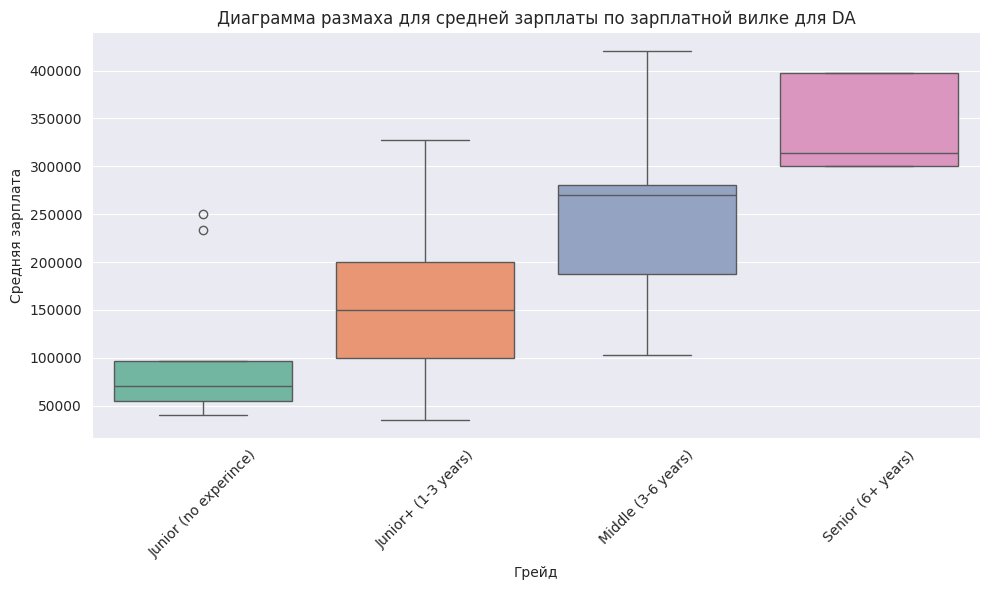

In [116]:
plt.figure(figsize=(10, 6))  # Размер графика
sns.boxplot(x='experience', y='mean_salary', data=da, palette='Set2', order=['Junior (no experince)',
                                                                             'Junior+ (1-3 years)',
                                                                             'Middle (3-6 years)',
                                                                             'Senior (6+ years)'])
plt.title('Диаграмма размаха для средней зарплаты по зарплатной вилке для DA')
plt.xlabel('Грейд')
plt.ylabel('Средняя зарплата')
plt.xticks(rotation=45)  # Поворот подписей оси x для лучшей читаемости
plt.tight_layout()
plt.show()

Зарплата по грейдам в Москве и Санкт-Петербурге



In [117]:
(
  da[da['area'] == 'Москва'].groupby('experience')['mean_salary'].agg(['median', 'count'])
).join(
  da[da['area'] == 'Санкт-Петербург'].groupby('experience')['mean_salary'].agg(['median', 'count']),
  lsuffix='_msc',
  rsuffix='_spb'
)

,median_msc,count_msc,median_spb,count_spb
experience,,,,
Junior (no experince),75000.0,6,96500.0,1
Junior+ (1-3 years),185000.0,33,92400.0,8
Middle (3-6 years),277750.0,18,195000.0,8
Senior (6+ years),300000.0,5,NaN,0


Как видно из таблицы в Санкт-Петербурге аналитики зарабатывают меньше, чем в Москве

### Занятость

In [118]:
da.groupby('experience')['employment'].value_counts().to_frame()

employment
experience            employment                     
Junior (no experince) Полная занятость             23
                      Стажировка                    2
Junior+ (1-3 years)   Полная занятость            384
                      Частичная занятость           2
                      Проектная работа              1
Middle (3-6 years)    Полная занятость            352
                      Частичная занятость           3
Senior (6+ years)     Полная занятость             18
                      Проектная работа              1

- Все вакансии, как правило, имеют полную занятость
- Стажировок и вакансий с частичной занятостью критически мало

### График работы

In [119]:
da.groupby('experience')['schedule'].value_counts().to_frame()

schedule
experience            schedule                  
Junior (no experince) Полный день             22
                      Удаленная работа         2
                      Гибкий график            1
Junior+ (1-3 years)   Полный день            305
                      Удаленная работа        67
                      Гибкий график           14
                      Сменный график           1
Middle (3-6 years)    Полный день            264
                      Удаленная работа        81
                      Гибкий график           10
Senior (6+ years)     Удаленная работа        11
                      Полный день              7
                      Гибкий график            1

- Junior (no experince) чаще всего работают полный день
- Доля вакансий с удалённой работой для Middle (3-6 years) чуть больше, чем для Junior+ (1-3 years)
- Наибольшее количество вакансий для Senior (6+ years) предлагают удалённую работу

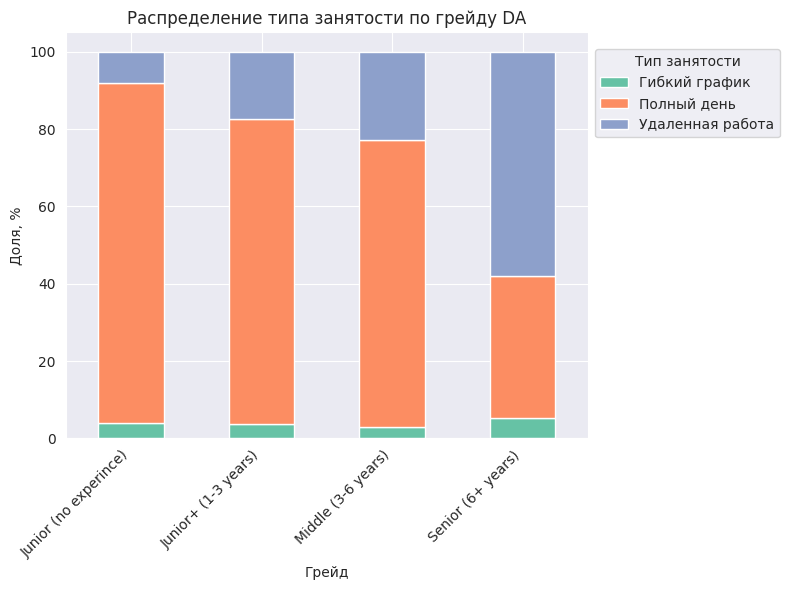

In [120]:
gr_da = (
    da.groupby('experience')['schedule']
    .value_counts()
    .to_frame()
    .rename(columns={'schedule': 'count'})
    .reset_index()
)

gr_da = gr_da[gr_da['schedule'] != 'Сменный график']

grouped = gr_da.groupby(['experience', 'schedule']).sum()

grouped['percentage'] = grouped.groupby(level=0).apply(lambda x: 100 * x / x.sum())

ax = grouped.unstack().plot(kind='bar', y='percentage', stacked=True, figsize=(8, 6))

ax.set_title('Распределение типа занятости по грейду DA')
ax.set_xlabel('Грейд')
ax.set_ylabel('Доля, %')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(title='Тип занятости', loc='center left', bbox_to_anchor=(1, 0.85))

plt.tight_layout()
plt.show()

C повышением грейда растёт доля вакансий с удалённым типом работы

### Типичное место работы DA

#### Junior (no experience)

**Работодатель:**
- ресо-гарантия, сао	(4 вакансии)
- сбер	(4 вакансии)
- компания cadesign	(2 вакансии)

**Медианная зарплата:** 70000 руб	(n = 9 наблюдений)

**Занятость:** Полная занятость

**График работы:** Полный день

#### Junior+

**Работодатель:**
- сбер	(65 вакансий)
- мтс	(25 вакансий)
- wildberries	(15 вакансий)
- магнит, розничная сеть	(10 вакансий)
- росбанк	(7 вакансий)

**Медианная зарплата:** 150000 руб	(n = 49 наблюдений)

**Занятость:** Полная занятость

**График работы:** Полный день	(n = 305) против Удаленная работа	(67) Гибкий график	(14)

#### Middle

**Работодатель:**
- сбер	(32 вакансии)
- playrix	(21 вакансия)
- wildberries	(21 вакансия)
- «uzum technologies».	(10 вакансий)
- usetech	(9 вакансий)

**Медианная зарплата:** 270000 руб	(n = 39 наблюдений)

**Занятость:** Полная занятость

**График работы:** Полный день (n = 264) против Удаленная работа (81) и Гибкий график	(10)


#### Senior

**Работодатель:**
- трт	(3 вакансии)
-anabar	(2 вакансии)
-деловые линии	(2 вакансии)
-wagner and experts	(2 вакансии)
-леруа мерлен	(2 вакансии)

**Медианная зарплата:** 313625 руб	(n = 8 наблюдений)

**Занятость:** Полная занятость

**График работы:** Удаленная работа	(n = 11) против Полный день	(7)




## Бизнес-аналитик

### ТОП-работодателей

In [121]:
ba.groupby('experience')['employer'].apply(lambda x: x.value_counts().head()).to_frame()

employer
experience                                                    
Junior (no experince) aston                                 59
                      апогей-екб                            10
                      апогей крд                            10
                      changellenge                           7
                      компания апогей (1с-франчайзи)         7
Junior+ (1-3 years)   банк втб (пао)                        46
                      магнит, розничная сеть                37
                      сбер                                  36
                      ozon                                  20
                      псб (пао «промсвязьбанк»)             19
Middle (3-6 years)    банк втб (пао)                        42
                      иннотех, группа компаний              21
                      тинькофф                              20
                      сибур, группа компаний                19
                      т1                                    18
Senior (6+ years)     playrix                                6
                      1221системс                            3
                      custis                                 3
                      оптиком, компания                      3
                      ультиматек                             3

### Зарплата

In [122]:
ba['mean_salary'] = ba.apply(mean_salary, axis=1)
ba.groupby('experience')['mean_salary'].agg(['median', 'count'])

,median,count
experience,,
Junior (no experince),67500.0,173
Junior+ (1-3 years),100000.0,593
Middle (3-6 years),170000.0,311
Senior (6+ years),245000.0,18


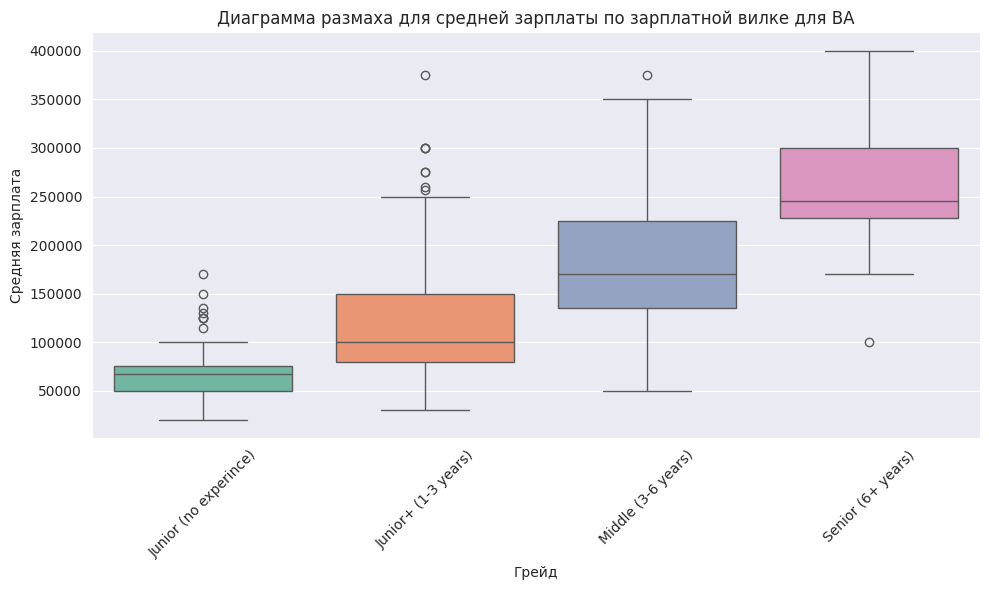

In [123]:
plt.figure(figsize=(10, 6))  # Размер графика
sns.boxplot(x='experience', y='mean_salary', data=ba, palette='Set2', order=['Junior (no experince)',
                                                                             'Junior+ (1-3 years)',
                                                                             'Middle (3-6 years)',
                                                                             'Senior (6+ years)'])
plt.title('Диаграмма размаха для средней зарплаты по зарплатной вилке для BA')
plt.xlabel('Грейд')
plt.ylabel('Средняя зарплата')
plt.xticks(rotation=45)  # Поворот подписей оси x для лучшей читаемости
plt.tight_layout()
plt.show()

Зарплата стабильно растет с повышением грейда

### Занятость

In [124]:
ba.groupby('experience')['employment'].value_counts().to_frame()

employment
experience            employment                     
Junior (no experince) Полная занятость            248
                      Стажировка                  113
                      Проектная работа              2
                      Частичная занятость           1
Junior+ (1-3 years)   Полная занятость           2102
                      Проектная работа              9
                      Стажировка                    6
                      Частичная занятость           5
Middle (3-6 years)    Полная занятость           1585
                      Проектная работа              8
                      Частичная занятость           2
                      Стажировка                    1
Senior (6+ years)     Полная занятость             89

- Для Junior (no experince)	практически треть вакансий - стажировки
- Для остальных грейдов преобладает полная занятость

### График работы

In [125]:
(
    ba
    .groupby('experience')['schedule']
    .value_counts()
    .to_frame()
    .rename(columns={'schedule': 'count'})
)

count
experience            schedule               
Junior (no experince) Полный день         311
                      Удаленная работа     34
                      Гибкий график        19
Junior+ (1-3 years)   Полный день        1735
                      Удаленная работа    328
                      Гибкий график        55
                      Сменный график        4
Middle (3-6 years)    Полный день        1227
                      Удаленная работа    330
                      Гибкий график        39
Senior (6+ years)     Полный день          62
                      Удаленная работа     25
                      Гибкий график         2

- Для всех грейдов представлено значительное количество вакансий с удалённой работой


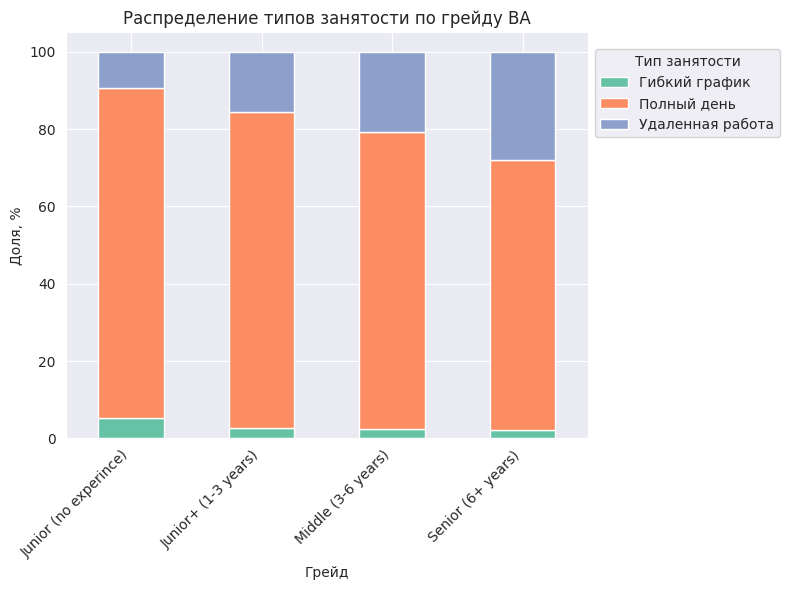

In [126]:
gr_ba = (
    ba.groupby('experience')['schedule']
    .value_counts()
    .to_frame()
    .rename(columns={'schedule': 'count'})
    .reset_index()
)

gr_ba = gr_ba[gr_ba['schedule'] != 'Сменный график']

grouped = gr_ba.groupby(['experience', 'schedule']).sum()

grouped['percentage'] = grouped.groupby(level=0).apply(lambda x: 100 * x / x.sum())

ax = grouped.unstack().plot(kind='bar', y='percentage', stacked=True, figsize=(8, 6))

ax.set_title('Распределение типов занятости по грейду BA')
ax.set_xlabel('Грейд')
ax.set_ylabel('Доля, %')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(title='Тип занятости', loc='center left', bbox_to_anchor=(1, 0.85))

plt.tight_layout()
plt.show()

C повышением грейда растёт доля вакансий с удалённым типом работы

### Типичное место работы BA

#### Junior (no experience)

**Работодатель:**
- aston	(59)
- апогей-екб	(10)
- апогей крд	(10)
- changellenge	(7)
- компания апогей (1с-франчайзи)	(7)

**Медианная зарплата:** 67500 руб	(n = 173 наблюдений)

**Занятость:** Полная занятость

**График работы:** Полный день (n = 311) против Удаленная работа (34) и Гибкий график	(19)

#### Junior+

**Работодатель:**
- банк втб (пао)	(46)
- магнит, розничная сеть	(37)
- сбер	(36)
- ozon	(20)
- псб (пао «промсвязьбанк»)	(19)

**Медианная зарплата:** 100000 руб	(n = 593 наблюдений)

**Занятость:** Полная занятость

**График работы:** Полный день (1735) против
Удаленная работа	(328)
Гибкий график	(55)

#### Middle
**Работодатель:**
- банк втб (пао)	(42)
- иннотех, группа компаний	(21)
- тинькофф	(20)
- сибур, группа компаний	(19)
- т1	(18)

**Медианная зарплата:** 170000 руб	(n = 311 наблюдений)

**Занятость:** Полная занятость

**График работы:** Полный день	(1227)
против Удаленная работа	(330)
Гибкий график	(39)

#### Senior

**Работодатель:**
- playrix	(6)
- 1221системс	(3)
- custis	(3)
- оптиком, компания	(3)
- ультиматек	(3)

**Медианная зарплата:** 245000 руб	(n = 18 наблюдений)

**Занятость:** Полная занятость

**График работы:** Полный день	(62)
против
Удаленная работа	(25)


# Расчет динамики количества вакансий для Аналитика данных


## По месяцам

In [127]:
da['date'] = da['published_at'].dt.date
da['month'] = da['published_at'].dt.to_period('M')

In [128]:
print(f"min date DA: {da['date'].min()}")
print(f"max date DA: {da['date'].max()}")

min date DA: 2023-09-26
max date DA: 2024-01-30


Исключим сентябрь из исследования помесячной динамики, поскольку данные представлены только с 26 сентября.

In [129]:
da_month_dyn = (
    da[da['month'] != pd.Period('2023-09', freq='M')]
    .groupby(['experience','month'])
    ['name']
    .count()
    .reset_index()
    .rename(columns={'name': 'count'})
)
da_month_dyn['month'] = da_month_dyn['month'].astype(str)
da_month_dyn

,experience,month,count
0,Junior (no experince),2023-10,6
1,Junior (no experince),2023-11,6
2,Junior (no experince),2023-12,5
3,Junior (no experince),2024-01,7
4,Junior+ (1-3 years),2023-10,97
5,Junior+ (1-3 years),2023-11,84
6,Junior+ (1-3 years),2023-12,74
7,Junior+ (1-3 years),2024-01,122
8,Middle (3-6 years),2023-10,83
9,Middle (3-6 years),2023-11,89


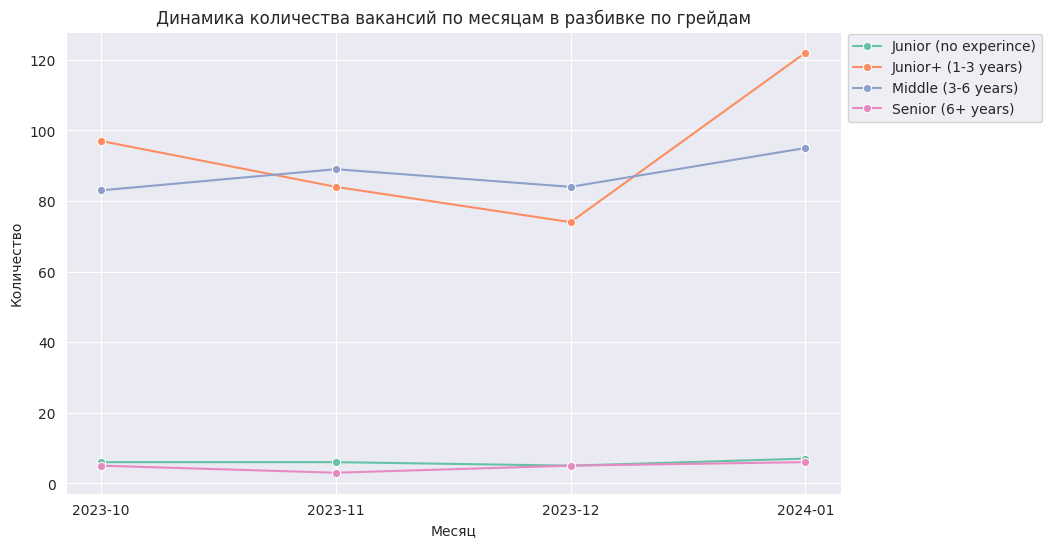

In [130]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=da_month_dyn, x='month', y='count', hue='experience', marker='o')

plt.title('Динамика количества вакансий по месяцам в разбивке по грейдам')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.legend(title='Грейд')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.9))

plt.show()

- Для грейда Junior+ заметна просадка по количеству вакансий в декабре (меньше 80) и достижение максимума в январе (больше 120)
- Динамика количества вакансий для остальных грейдов относительно стабильна

## По неделям

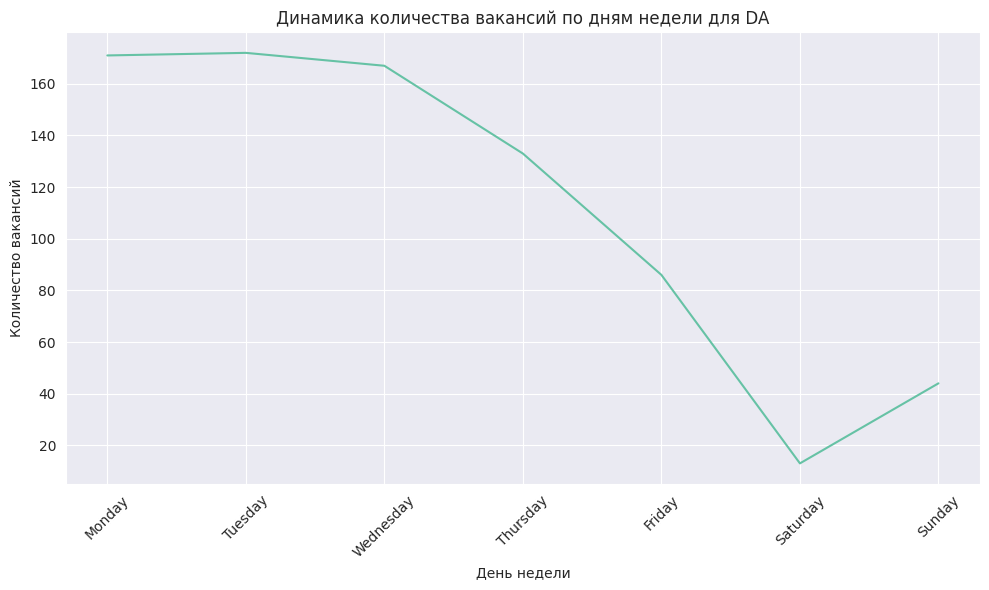

In [131]:
da['weekday'] = da['published_at'].dt.day_name()

vacancies_by_weekday = da['weekday'].value_counts()

# Отсортируем дни недели в правильном порядке (понедельник - воскресенье)
vacancies_by_weekday = vacancies_by_weekday.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
sns.lineplot(vacancies_by_weekday)
plt.title('Динамика количества вакансий по дням недели для DA')
plt.xlabel('День недели')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

Ударные дни по количеству размещенных вакансий - Понедельник, вторник, среда. Cнижение количества вакансий идёт со среды.Минимальное число вакансий публикуется в субботу, но уже в воскресенье HR-специалисты публикуют больше.

# Расчет динамики количества вакансий для Бизнес-аналитика

## По месяцам

In [132]:
ba['date'] = ba['published_at'].dt.date
ba['month'] = ba['published_at'].dt.to_period('M')

In [133]:
print(f"min date BA: {ba['date'].min()}")
print(f"max date BA: {ba['date'].max()}")

min date BA: 2023-10-02
max date BA: 2024-01-30


Месяцы равнонаполненные по количеству дней

In [134]:
ba_month_dyn = (
    ba
    .groupby(['experience','month'])
    ['name']
    .count()
    .reset_index()
    .rename(columns={'name': 'count'})
)
ba_month_dyn['month'] = da_month_dyn['month'].astype(str)
ba_month_dyn

,experience,month,count
0,Junior (no experince),2023-10,23
1,Junior (no experince),2023-11,124
2,Junior (no experince),2023-12,72
3,Junior (no experince),2024-01,145
4,Junior+ (1-3 years),2023-10,160
5,Junior+ (1-3 years),2023-11,603
6,Junior+ (1-3 years),2023-12,456
7,Junior+ (1-3 years),2024-01,903
8,Middle (3-6 years),2023-10,103
9,Middle (3-6 years),2023-11,441


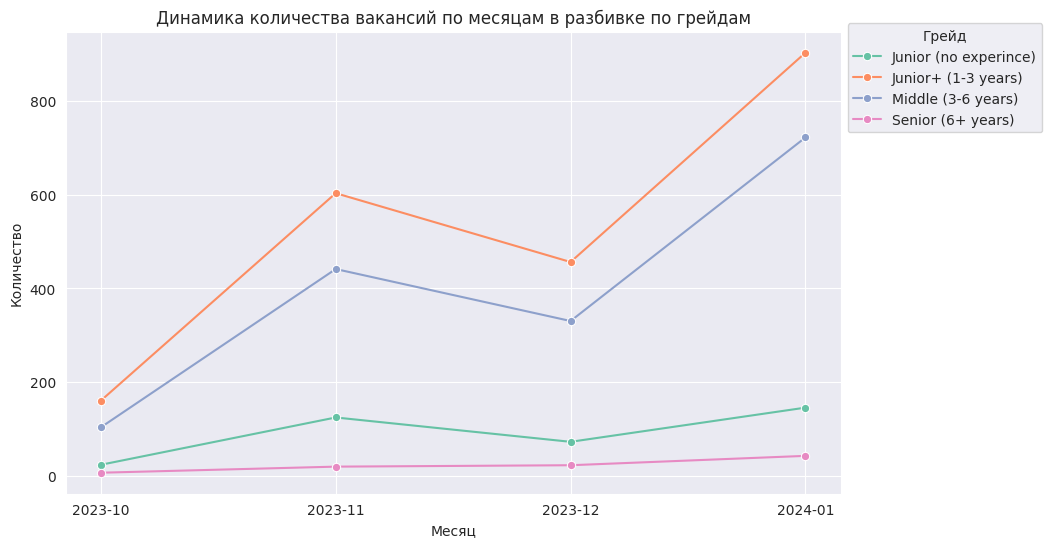

In [135]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=ba_month_dyn, x='month', y='count', hue='experience', marker='o')

plt.title('Динамика количества вакансий по месяцам в разбивке по грейдам')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.legend(title='Грейд', loc='center left', bbox_to_anchor=(1, 0.9))

plt.show()

Для грейдов Junior+ и Middle заметны сильные скачки в изменении количества вакансий:
- Кратный рост в ноябре, сильное снижение в декабре, затем вновь кратный рост в январе

Для Junior (no experience) наблюдается схожая тенденция, однако сами колебания в абсолютном выражении ниже

Для Senior заметен положительный тренд в увеличении количества вакансий.

## По неделям



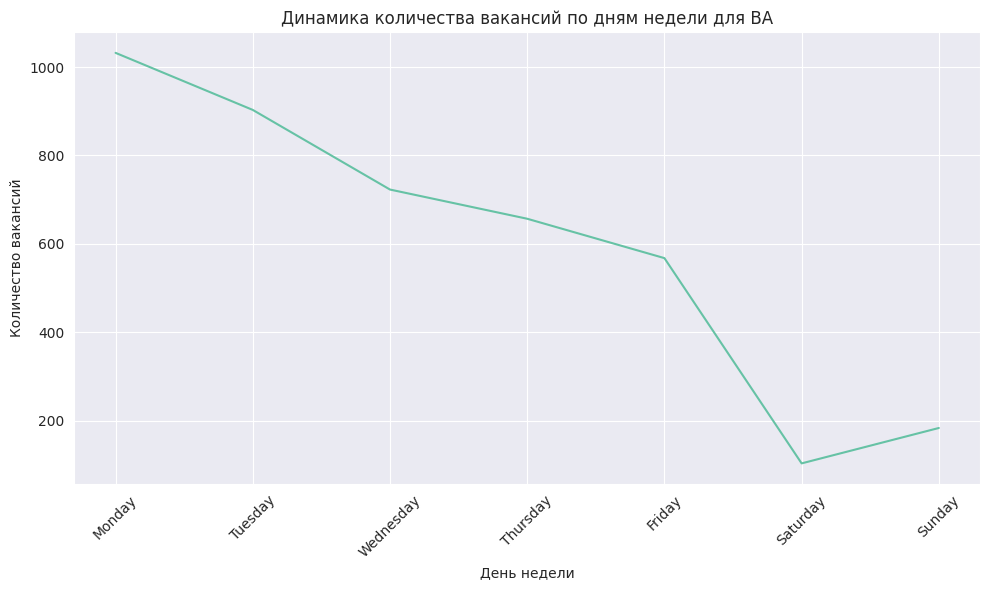

In [136]:
ba['weekday'] = ba['published_at'].dt.day_name()

vacancies_by_weekday = ba['weekday'].value_counts()

# Отсортируем дни недели в правильном порядке (понедельник - воскресенье)
vacancies_by_weekday = vacancies_by_weekday.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
sns.lineplot(vacancies_by_weekday)
plt.title('Динамика количества вакансий по дням недели для BA')
plt.xlabel('День недели')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

Наибольшее количество вакансий публикуется в Понедельник. Со вторника начинается снижение активности HR

# Формулирование выводов и рекомендаций


## DA

Выбирая из октября, ноября, декабря, января: **самые благоприятные условия по количеству вакансий наблюдаются**:
  - При грейде Junior+: январь и октябрь
  - Для остальных грейдов сильных различий нет

**При переговорах о зарплате** стоит ориентироваться на медианные показатели для грейдов:
 - Junior (no experince)	70000
 - Junior+ (1-3 years)	150000
 - Middle (3-6 years)	270000
 - Senior (6+ years)	313625

**При выборе графика работы** стоит ориентироваться на
- Junior (no experince) чаще всего работают полный день
- Доля вакансий с удалённой работой для Middle и Junior+ в пределах 25% процентов от общего количества
- Для Senior (6+ years) 40% вакансий предлагают удалённую работу (маленькая выборка)

О наиболее **типичных работодателях** можно делать выводы только по грейдам Junior и Middle в силу размера выборки. Типичный работодатель определён как работодатель с наибольшим количеством вакансий

Для Junior+:
- Сбер
- МТС
- Wildberries
- Магнит, розничная сеть
- Росбанк

Для Middle:
- Cбер
- Playrix
- Wildberries
- «Uzum technologies»
- Usetech

Наибольшее количество вакансий представлено для Junior+: 387 (49% от общего) и Middle: 355 (45% от общего)


Выводы о топ-скиллах можно делать только для грейдов Junior+ и Middle в силу размера выборки

**Топ-7 Хард-скиллов DA:**
- Junior+ и Middle имеют одинаковый набор топ-4 навыков: SQL, Python, pandas, BI. Однако от специалистов Junior+ чаще требуют знание BI-системы.
- Топ-5 навык для Junior+ - математическая статистика, в то время как у миддлов уже A/B тесты
- Топ-6 совпадает - Confluence
- Топ-7 для Junior+ - Excel, а для Middle - знание юнит-экономики

**Топ-3 Cофт-скилла DA:**

- Набор одинаков: от кандидатов требуют навыки коммуникации, аналитическое мышление и умение работать с документацией



## BA

Выбирая из октября, ноября, декабря, января: **самые благоприятные условия по количеству вакансий наблюдаются**:
  - При грейде Junior+ и Middle в январе и ноябре.
  - Для остальных грейдов сильных различий нет

**При переговорах о зарплате** стоит ориентироваться на медианные показатели для грейдов:

- Junior (no experince)	67500
- Junior+ (1-3 years)	100000
- Middle (3-6 years)	170000
- Senior (6+ years)	245000

**При выборе графика работы** стоит ориентироваться на
- Junior - 10% вакансий с удаленным типом
- Junior+ - 20% вакансий с удаленным типом
- Middle - 25% вакансий с удаленным типом
- Senior - 40% вакансий с удаленным типом

О наиболее **типичных работодателях** можно делать выводы для всех грейдов кроме Senior в силу размера выборки. Типичный работодатель определён как работодатель с наибольшим количеством вакансий

Junior (no experience)
- Aston
- Aпогей-екб
- Aпогей крд
- Changellenge
- Компания апогей

Junior+
- Банк ВТБ ПАО
- Магнит, Розничная Сеть
- Сбер
- Ozon
- ПСБ ПАО «Промсвязьбанк»

Middle
- Банк ВТБ ПАО
- Иннотех, Группа Компаний
- Тинькофф
- Сибур, Группа Компаний
- Т1

Наибольшее количество вакансий представлено для Junior+:	2122 (51% от общего) и	Middle: 1596 (38% от общего)

#### Описание идеальных кандидатов

**Junior (no experience) BA:**

Топ-7 хард-скиллов:
1. Бизнес-анализ
2. SQL
3. Автоматизация процессов
4. 1С: бухгалтерия
5. UML
6. 1С: документооборот
7. Работа с большим объемом информации

Топ-3 софт-скиллов:
1. Аналитическое мышление
2. Документация
3. Коммуникация

**Junior+ (1-3 года опыта) BA:**

Топ-7 хард-скиллов:
1. Бизнес-анализ
2. Разработка технических заданий
3. BPMN
4. Confluence
5. Моделирование бизнес процессов
6. SQL
7. Анализ данных

Топ-5 софт-скиллов:
1. Документация
2. Аналитическое мышление
3. Коммуникация
4. Работа в команде
5. Scrum

**Middle (3-6 лет опыта) BA:**

Топ-7 хард-скиллов:
1. Бизнес-анализ
2. BPMN
3. Confluence
4. SQL
5. Разработка технических заданий
6. Моделирование бизнес процессов
7. Оптимизация бизнес процессов

Топ-5 софт-скиллов:
1. Документация
2. Коммуникация
3. Аналитическое мышление
4. Проактивность
5. Работа в команде

**Senior (6+ лет опыта) BA:**

Топ-7 хард-скиллов:
1. Бизнес-анализ
2. SQL
3. BPMN
4. Моделирование бизнес процессов
5. UML
6. Confluence
7. Разработка технических заданий

Топ-3 софт-скиллов:
1. Документация
2. Коммуникация
3. Аналитическое мышление
